In [3]:
import os

os.environ["OMP_NUM_THREADS"] = "1"

In [5]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

In [6]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
print(type(iris_df['petal width (cm)']))
print(type(iris_df))
iris_df.describe()

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


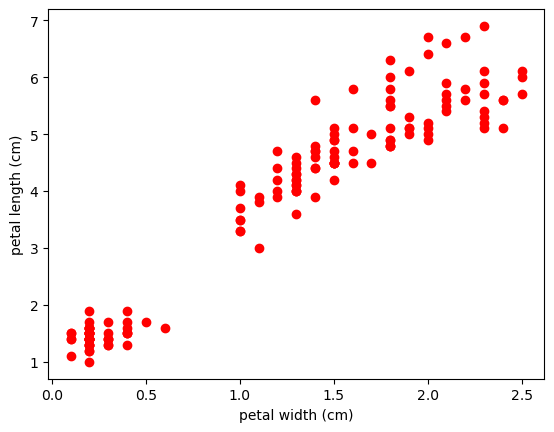

In [11]:
import matplotlib.pyplot as plt

plt.scatter(iris_df['petal width (cm)'], iris_df['petal length (cm)'], color='red')
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [12]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")


from sklearn.cluster import KMeans
k_rng = range(1,10)
sse = []
for i in k_rng:
    km = KMeans(n_clusters=i)
    km.fit(iris_df[['petal width (cm)', 'petal length (cm)']])
    sse.append(km.inertia_)

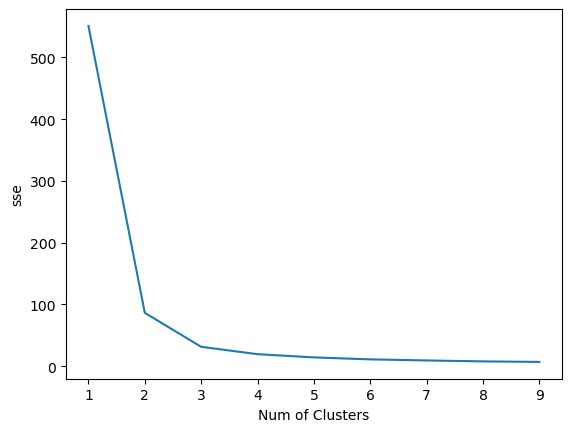

In [14]:
plt.xlabel('Num of Clusters')
plt.ylabel('sse')
plt.plot(k_rng, sse)

In [15]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(iris_df[['petal width (cm)','petal length (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
iris_df['cluster'] = y_predicted
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [23]:
km.cluster_centers_

array([[1.34230769, 4.26923077],
       [0.246     , 1.462     ],
       [2.0375    , 5.59583333]])

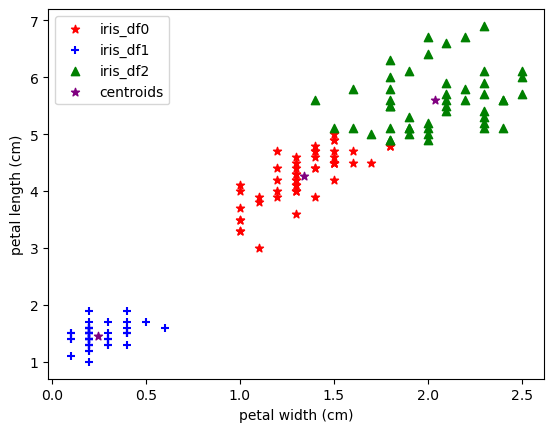

In [25]:
iris_df0 = iris_df[iris_df['cluster']==0]
iris_df1 = iris_df[iris_df['cluster']==1]
iris_df2 = iris_df[iris_df['cluster']==2]

plt.scatter(iris_df0['petal width (cm)'], iris_df0['petal length (cm)'], label='iris_df0', color='red', marker='*')
plt.scatter(iris_df1['petal width (cm)'], iris_df1['petal length (cm)'], label='iris_df1', color='blue', marker='+')
plt.scatter(iris_df2['petal width (cm)'], iris_df2['petal length (cm)'], label='iris_df2', color='green', marker='^')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], label='centroids', color='purple', marker='*')
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')
plt.legend()
plt.show()

In [27]:
iris_df['target'] = iris.target
print(iris.target_names)
iris_df

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [29]:
target_mapping = {0:'setosa', 1:'versisolor', 2:'virginica'}
iris_df['target_name'] = iris_df['target'].map(target_mapping)

In [31]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target,target_name
0,5.1,3.5,1.4,0.2,1,0,setosa
1,4.9,3.0,1.4,0.2,1,0,setosa
2,4.7,3.2,1.3,0.2,1,0,setosa
3,4.6,3.1,1.5,0.2,1,0,setosa
4,5.0,3.6,1.4,0.2,1,0,setosa


In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(iris_df.cluster, iris_df.target)
cm

array([[ 0, 48,  4],
       [50,  0,  0],
       [ 0,  2, 46]], dtype=int64)

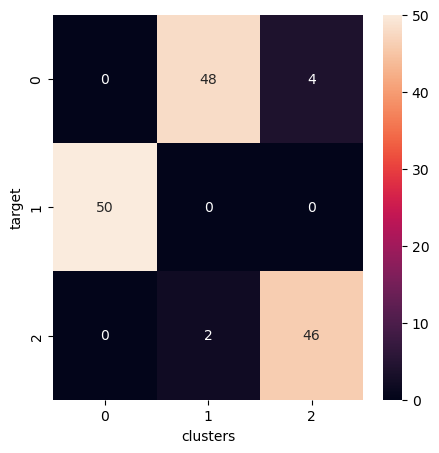

In [37]:
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True)
plt.xlabel("clusters")
plt.ylabel("target")
plt.show()